In [85]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def load_and_process_excel(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Assuming the structure is similar to the previous file
    # with tests separated by an empty column and each test having angle and torque columns
    def extract_test_data(df, start_col):
        angle_col = df.columns[start_col + 2]
        torque_col = df.columns[start_col + 3]
        angles = df[angle_col].dropna()[1:].astype(float)
        torques = df[torque_col].dropna()[1:].astype(float)
        return angles, torques

    # Extract data for each test
    tests = [extract_test_data(df, i) for i in range(0, 21, 5)]

    # Calculate mean angle and interpolate torques for these mean angles for each test
    mean_angles = np.mean([test[0].values for test in tests], axis=0)
    interpolated_torques = [interp1d(angles, torques, bounds_error=False, fill_value="extrapolate")(mean_angles) for angles, torques in tests]

    # Calculate mean torque and standard deviation
    mean_torque = np.mean(interpolated_torques, axis=0)
    std_torque = np.std(interpolated_torques, axis=0)

    # Update DataFrame
    additional_rows = max(len(mean_angles), len(df)) - len(df)
    if additional_rows > 0:
        df = pd.concat([df, pd.DataFrame(index=range(additional_rows))], ignore_index=True)

    df['Calculated Mean Angle'] = pd.Series(mean_angles)
    df['Calculated Mean Torque'] = pd.Series(mean_torque)
    df['Torque Std Dev'] = pd.Series(std_torque)

    # Add columns for interpolated torque for each set
    for i, torque_set in enumerate(interpolated_torques):
        df[f'Interpolated Torque Set {i+1}'] = pd.Series(torque_set)

    # Return the updated DataFrame
    return df

# Example usage
file_path = r'C:\Users\Eoin\Downloads\1.5mm testz.xlsx'  # Update this path
updated_df = load_and_process_excel(file_path)

# Save the updated DataFrame to a new Excel file
updated_file_path = r'C:\Users\Eoin\Downloads\vnew 1.5mm quasi mm.xlsx'  # Update this path as needed
updated_df.to_excel(updated_file_path, index=False)

print(f"Updated Excel file saved to {updated_file_path}")


Updated Excel file saved to C:\Users\Eoin\Downloads\vnew 1.5mm quasi mm.xlsx


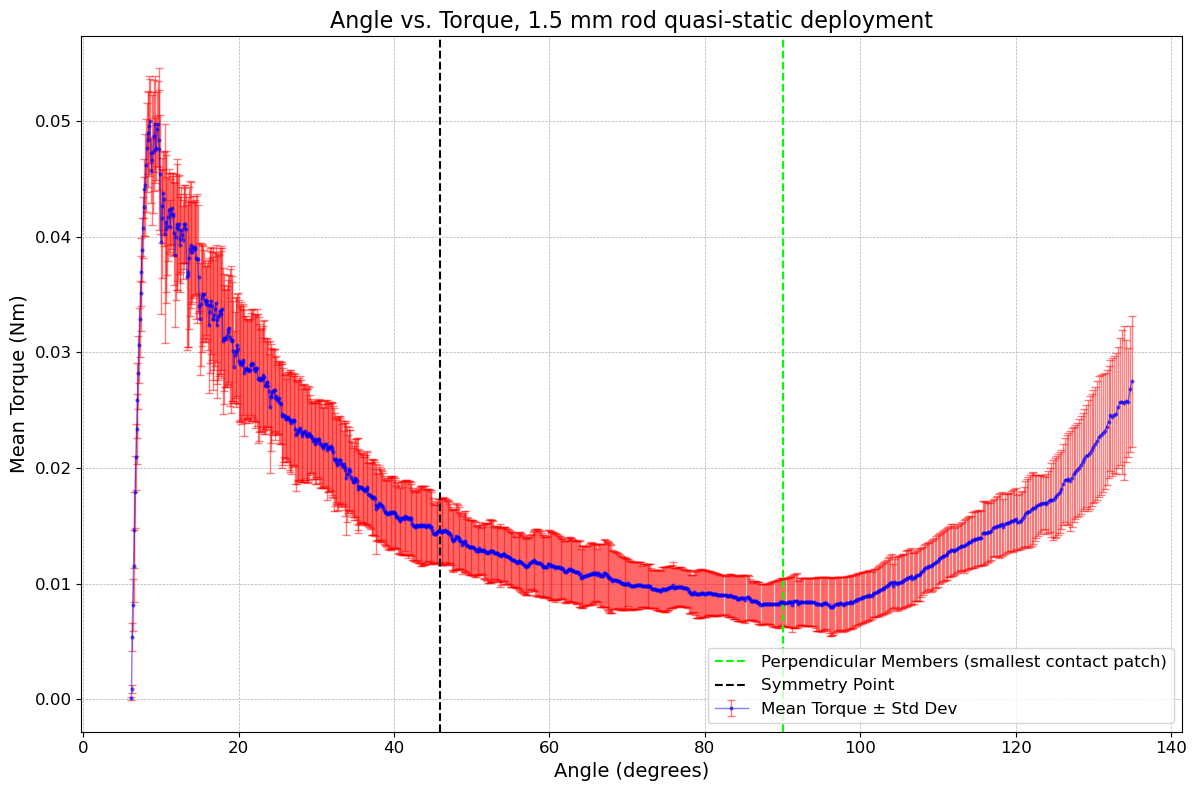

In [86]:
import numpy as np

def plot_mean_angle_vs_torque(mean_angles, mean_torque, std_torque):
    # Filter out negative torque values
    mean_angles = mean_angles[mean_torque >= 0]
    std_torque = std_torque[mean_torque >= 0]
    mean_torque = mean_torque[mean_torque >= 0]

    # Convert radians to degrees and multiply by 2
    mean_angles_degrees = np.degrees(mean_angles) * 2

    plt.figure(figsize=(12, 8))
    plt.errorbar(mean_angles_degrees, mean_torque, yerr=std_torque, fmt='o', capsize=3, ecolor='red', alpha=0.5, linestyle='-', color='blue', linewidth=1, markersize=2, label='Mean Torque ± Std Dev')

    plt.xlabel('Angle (degrees)', fontsize=14)
    plt.ylabel('Mean Torque (Nm)', fontsize=14)
    #plt.title('Angle vs. Torque, 1.5 mm rod 10 second deployment', fontsize=16)
    plt.title('Angle vs. Torque, 1.5 mm rod quasi-static deployment', fontsize=16)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(x=90, color=(0, 1, 0), linestyle='--', label='Perpendicular Members (smallest contact patch)')  # Adjust the angle in degrees accordingly
    plt.axvline(x=45.92, color=(0, 0, 0), linestyle='--', label='Symmetry Point')
    plt.legend(loc='lower right', fontsize=12)
    plt.savefig(r'C:\Users\Eoin\Downloads\plot_actual_1mm_quasistatic.jpg')
    plt.show()

# After calculating mean_angles, mean_torque, and std_torque, call the plotting function
# This should be done after the load_and_process_excel function has been executed
plot_mean_angle_vs_torque(updated_df['Calculated Mean Angle'], updated_df['Calculated Mean Torque'], updated_df['Torque Std Dev'])


In [39]:
 # Find the index of the maximum standard deviation
    max_std_index = np.argmax(std_torque)
    min_std_index = np.argmin(std_torque)
    
    # Plot vertical lines at the points of maximum and minimum standard deviation
    max_std_angle = mean_angles_degrees[max_std_index]
    max_std_value = std_torque[max_std_index]
    plt.axvline(x=max_std_angle, color='orange', linestyle='--', label='Max Std Dev')
    
    min_std_angle = mean_angles_degrees[min_std_index]
    min_std_value = std_torque[min_std_index]
    plt.axvline(x=min_std_angle, color='green', linestyle='--', label='Min Std Dev')
    
    # Add text box with standard deviation as percentage of mean torque for maximum and minimum
    max_std_percentage = (max_std_value / mean_torque[max_std_index]) * 100
    text_max = f'Max Std Dev: {max_std_percentage:.2f}%'
    plt.text(max_std_angle, mean_torque[max_std_index], text_max, fontsize=12, va='bottom', ha='right', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    min_std_percentage = (min_std_value / mean_torque[min_std_index]) * 100
    text_min = f'Min Std Dev: {min_std_percentage:.2f}%'
    plt.text(min_std_angle, mean_torque[min_std_index], text_min, fontsize=12, va='bottom', ha='right', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

IndentationError: unexpected indent (1581491297.py, line 2)

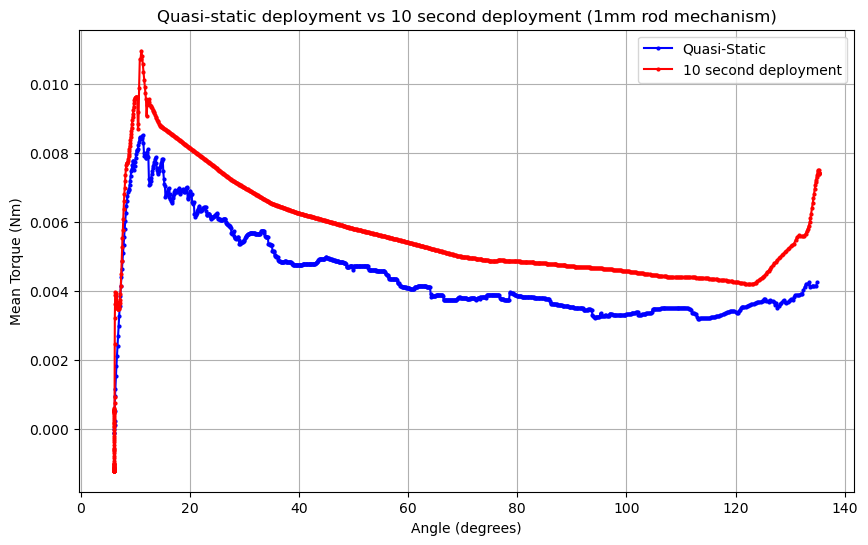

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path to the Excel spreadsheet
file_path = r'C:\Users\Eoin\Downloads\1mm compare.xlsx'

# Read the Excel file into a pandas dataframe
df = pd.read_excel(file_path)

# Convert angle from radians to degrees and multiply by 2
df['AngleQS_degrees'] = np.degrees(df['AngleQS']) * 2
df['Angle10s_degrees'] = np.degrees(df['Angle10s']) * 2

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first dataset (quasi-static)
plt.plot(df["AngleQS_degrees"], df["TorqueQS"], label="Quasi-Static", color="blue", marker="o", markersize=2)

# Plot the second dataset (10 deployment)
plt.plot(df["Angle10s_degrees"], df["Torque10s"], label="10 second deployment", color="red", marker="o", markersize=2)

# Add labels and title
plt.xlabel("Angle (degrees)")
plt.ylabel("Mean Torque (Nm)")
plt.title("Quasi-static deployment vs 10 second deployment (1mm rod mechanism)")

# Add legend
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(r'C:\Users\Eoin\Downloads\plot for 1mm compare.jpg')

# Show the plot
plt.show()




Column Names:
Index(['angle1', 'torque1', 'Unnamed: 2', 'angle2', 'torque2', 'Unnamed: 5',
       'angle3', 'torque3', 'angles1', 'angles2'],
      dtype='object')
Column 'angle3' found in DataFrame.


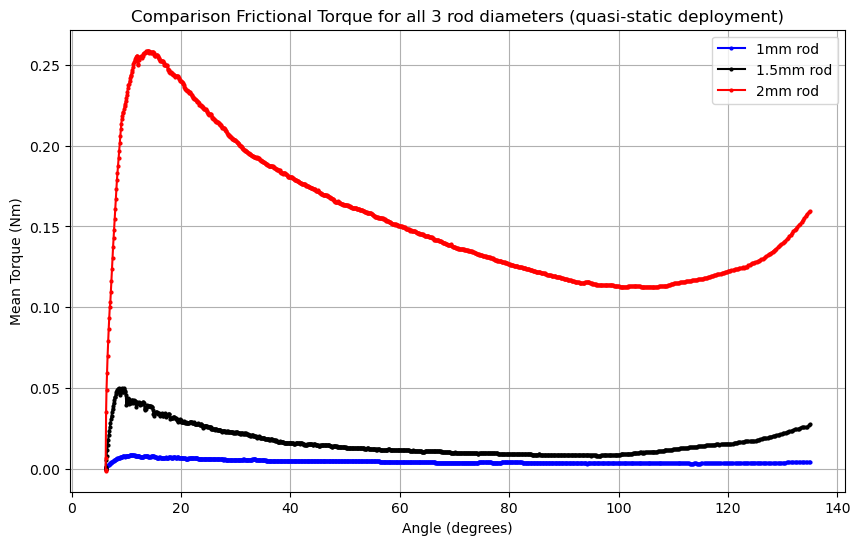

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path to the Excel spreadsheet
file_path = r'C:\Users\Eoin\Downloads\quasi compare.xlsx'

# Read the Excel file into a pandas dataframe
df = pd.read_excel(file_path)

# Convert angle from radians to degrees and multiply by 2 for the existing sets of data
df['angles1'] = np.degrees(df['angle1']) * 2
df['angles2'] = np.degrees(df['angle2']) * 2

# Print all column names in the DataFrame
print("Column Names:")
print(df.columns)

# Check if 'angle3' column exists
if 'angle3' in df.columns and 'torque3' in df.columns:
    df['angles3'] = np.degrees(df['angle3']) * 2
    print("Column 'angle3' found in DataFrame.")
else:
    print("Column 'angle3' not found in DataFrame.")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first dataset (quasi-static)
plt.plot(df["angles1"], df["torque1"], label="1mm rod", color="blue", marker="o", markersize=2)

# Plot the second dataset (10 deployment)
plt.plot(df["angles2"], df["torque2"], label="1.5mm rod", color="black", marker="o", markersize=2)

# Check if 'angle3' column exists and plot it if it does
if 'angle3' in df.columns and 'torque3' in df.columns:
    plt.plot(df["angles3"], df["torque3"], label="2mm rod", color="red", marker="o", markersize=2)

# Add labels and title
plt.xlabel("Angle (degrees)")
plt.ylabel("Mean Torque (Nm)")
plt.title("Comparison Frictional Torque for all 3 rod diameters (quasi-static deployment)" )

# Add legend
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(r'C:\Users\Eoin\Downloads\plot for 480 allmm compare.jpg')

# Show the plot
plt.show()


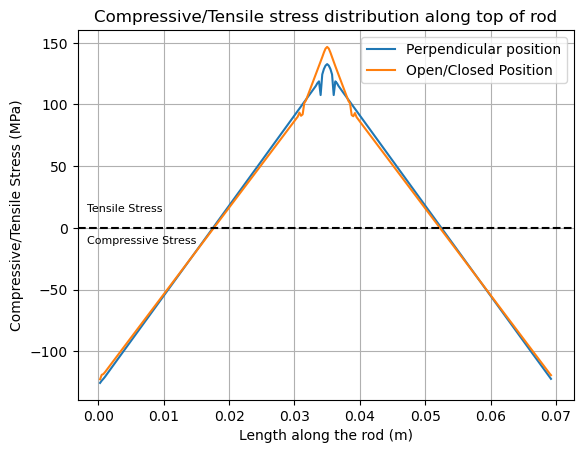

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the full path to the Excel file
excel_file_path = r'C:\Users\Eoin\Downloads\lengthwaysstress.xlsx'

# Read the data from the Excel file
lengthwaysstress = pd.read_excel(excel_file_path)

# Extracting data for dataset 1
lengths1 = lengthwaysstress['length1'].tolist()
stresses1 = lengthwaysstress['stress1'].tolist()

# Convert stress from Pa to MPa
stresses1_MPa = [stress / 1e6 for stress in stresses1]

# Extracting data for dataset 2
lengths2 = lengthwaysstress['length2'].tolist()
stresses2 = lengthwaysstress['stress2'].tolist()

# Convert stress from Pa to MPa
stresses2_MPa = [stress / 1e6 for stress in stresses2]

# Plotting dataset 1
plt.plot(lengths1, stresses1_MPa, label='Perpendicular position')  # Set label for dataset 1

# Plotting dataset 2
plt.plot(lengths2, stresses2_MPa, label='Open/Closed Position')  # Set label for dataset 2

# Adding a horizontal line at y = 0
plt.axhline(0, color='black', linestyle='--')

# Manually specify the x and y coordinates for each label
tensile_label_x = lengths1[-1] - 0.071
tensile_label_y = max(stresses1_MPa) * 0.1  # Adjust the y-coordinate to reduce the gap between labels
compressive_label_x = lengths1[-1] - 0.071
compressive_label_y = min(stresses1_MPa) * 0.1  # Adjust the y-coordinate to reduce the gap between labels

# Annotating the horizontal line with labels
plt.text(tensile_label_x, tensile_label_y, 'Tensile Stress', fontsize=8)
plt.text(compressive_label_x, compressive_label_y, 'Compressive Stress', fontsize=8)

# Adding labels and title
plt.xlabel('Length along the rod (m)')
plt.ylabel('Compressive/Tensile Stress (MPa)')
plt.title('Compressive/Tensile stress distribution along top of rod')

# Adding legend
plt.legend()
plt.grid(True)
# Save the plot to a file
plt.savefig(r'C:\Users\Eoin\Downloads\stress_distribution.png')  # Specify the file path and format (e.g., .png, .jpg)

# Displaying the graph
plt.show()


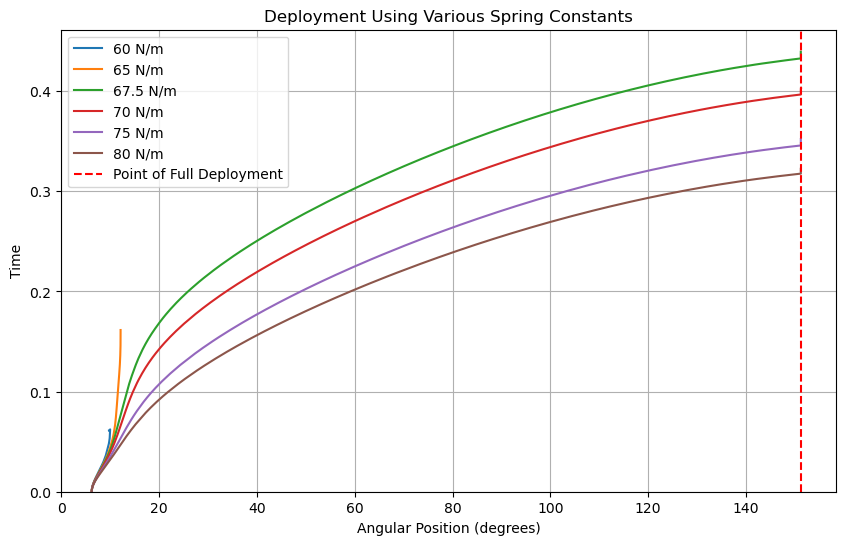

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the file path
file_path = r'C:\Users\Eoin\Downloads\spring tests model.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

# Extract data for each time and position set
time_set1 = data.iloc[:, 0]  # Time for set 1
position_set1_rad = data.iloc[:, 1]  # Position for set 1 in radians

time_set2 = data.iloc[:, 3]  # Time for set 2
position_set2_rad = data.iloc[:, 4]  # Position for set 2 in radians

time_set3 = data.iloc[:, 6]  # Time for set 3
position_set3_rad = data.iloc[:, 7]  # Position for set 3 in radians

time_set4 = data.iloc[:, 9]   # Time for set 4
position_set4_rad = data.iloc[:, 10]   # Position for set 4 in radians

time_set5 = data.iloc[:, 12]   # Time for set 5
position_set5_rad = data.iloc[:, 13]   # Position for set 5 in radians

time_set6 = data.iloc[:, 15]   # Time for set 6
position_set6_rad = data.iloc[:, 16]   # Position for set 6 in radians

# Convert position values from radians to degrees
position_set1_deg = np.degrees(position_set1_rad)
position_set2_deg = np.degrees(position_set2_rad)
position_set3_deg = np.degrees(position_set3_rad)
position_set4_deg = np.degrees(position_set4_rad)
position_set5_deg = np.degrees(position_set5_rad)
position_set6_deg = np.degrees(position_set6_rad)

# Plot each time-position set
plt.figure(figsize=(10, 6))

plt.plot(position_set1_deg, time_set1, label='60 N/m')
plt.plot(position_set2_deg, time_set2, label='65 N/m')
plt.plot(position_set3_deg, time_set3, label='67.5 N/m')
plt.plot(position_set4_deg, time_set4, label='70 N/m')
plt.plot(position_set5_deg, time_set5, label='75 N/m')
plt.plot(position_set6_deg, time_set6, label='80 N/m')

# Add labels and title
plt.xlabel('Angular Position (degrees)')
plt.ylabel('Time')
plt.title('Deployment Using Various Spring Constants')

# Set x and y axis limits to start from 0
plt.xlim(0, None)
plt.ylim(0, None)

# Add vertical line at maximum angle value
max_angle = max(position_set1_deg.max(), position_set2_deg.max(), position_set3_deg.max(), position_set4_deg.max(), position_set5_deg.max(), position_set6_deg.max())
plt.axvline(x=max_angle, color='r', linestyle='--', label='Point of Full Deployment')

# Show the plot
plt.legend()
plt.grid(True)
# Save the plot in the Downloads folder
save_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'spring_constants_graph.png')
plt.savefig(save_path)

# Show the plot
plt.show()


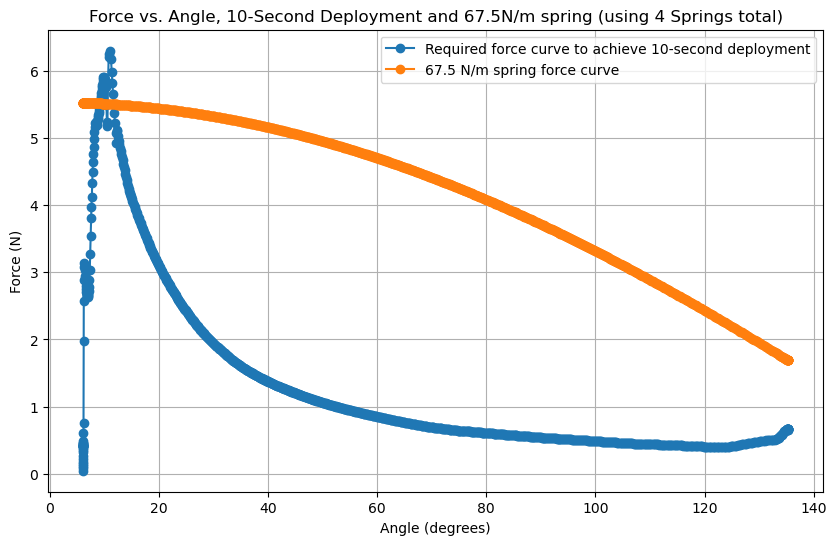

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file path
file_path = r'C:\Users\Eoin\Downloads\deployment force.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

# Extract angle in radians and force data
angles_rad = data['double']
forces = data['4 springs']
spring_ting = data['spring ting']

# Convert angles from radians to degrees
angles_deg = np.degrees(angles_rad)

# Plot force against angle in degrees
plt.figure(figsize=(10, 6))
plt.plot(angles_deg, forces, marker='o', linestyle='-', label='Required force curve to achieve 10-second deployment')
plt.plot(angles_deg, spring_ting, marker='o', linestyle='-', label='67.5 N/m spring force curve')

# Add labels and title
plt.xlabel('Angle (degrees)')
plt.ylabel('Force (N)')
plt.title('Force vs. Angle, 10-Second Deployment and 67.5N/m spring (using 4 Springs total)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)

# Save the plot to Downloads folder
save_path = r'C:\Users\Eoin\Downloads\force_vs_angle_4_springs.png'
plt.savefig(save_path)

# Show the plot
plt.show()




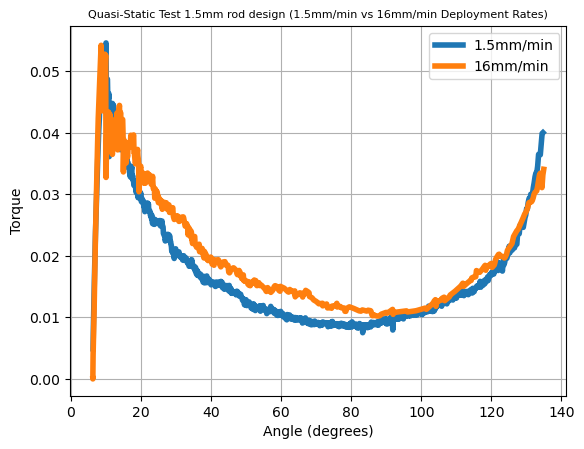

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = r"C:\Users\Eoin\Downloads\prove static 1.5mm.xlsx"
df = pd.read_excel(file_path)

# Convert angles from radians to degrees
df['double 1'] = np.degrees(df['double 1'])
df['double 2'] = np.degrees(df['double 2'])

# Plot the data
plt.plot(df['double 1'], df['torque 1'], label='1.5mm/min', linewidth=4)
plt.plot(df['double 2'], df['torque 2'], label='16mm/min', linewidth=4)
plt.xlabel('Angle (degrees)')
plt.ylabel('Torque')
plt.title('Quasi-Static Test 1.5mm rod design (1.5mm/min vs 16mm/min Deployment Rates)',fontsize=8)
plt.grid(True)
plt.legend()

# Save the graph
save_path = r"C:\Users\Eoin\Downloads\quasistatic1.5mm.png"
plt.savefig(save_path)

# Show the plot
plt.show()


In [24]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# alter filepath to choose the data you want to process
file_path = "C:\\Users\\Eoin\\Downloads\\480mm 1mm.xlsx"
df = pd.read_excel(file_path)

# give names of columsn for torque and angel data within the excel sheet
all5setsofangles = ['angle 1', 'angle 2', 'angle 3', 'angle 4', 'angle 5']
all5setsoftorques = ['torque 1', 'torque 2', 'torque 3', 'torque 4', 'torque 5']

# Extract angles and torques and put them into lists
angle_list = [df[col] for col in all5setsofangles]
torque_list = [df[col] for col in all5setsoftorques]


# from the lists Calculate mean angle fro all 5 angles. the below fucntion takes 1 angle from eahc list at a time
mean_angle = np.mean([angle.to_numpy() for angle in angle_list], axis=0)

# having got the mean angle interpolate all torque values for that mean angle for every single mean angle
interpolated_torque_values = [interp1d(angle, torque, bounds_error=False, fill_value="extrapolate")(mean_angle) for angle, torque in zip(angle_list, torque_list)]

# With all these interpolated torques for the same angle calculate the mean torque 
mean_torque = np.mean(interpolated_torque_values, axis=0)
# then find teh standard deviation from the mean torque curve
torque_std_dev = np.std(interpolated_torque_values, axis=0)

# with all teh resutls collected put them in a dataframe
df_of_results = pd.DataFrame({'Mean Angle': mean_angle,'Mean Torque': mean_torque, 'Torque Std Dev': torque_std_dev})

# Add the individual interpolated sets of torque to check against hand calcs
df_of_results['Interp Torque Set 1'] = interpolated_torque_values[0]
df_of_results['Interp Torque Set 2'] = interpolated_torque_values[1]
df_of_results['Interp Torque Set 3'] = interpolated_torque_values[2]
df_of_results['Interp Torque Set 4'] = interpolated_torque_values[3]
df_of_results['Interp Torque Set 5'] = interpolated_torque_values[4]

# output path to the excel file
output_path = "C:\\Users\\Eoin\\Downloads\\480mm_1mm_results.xlsx"
#use this function to make the excel file
df_of_results.to_excel(output_path, index=False)  # Save without row indices
#comment to print if the file is produced successfully
print("Saved successfully. New Excel file in Downloads with results:", output_path)

Saved successfully. New Excel file called  C:\Users\Eoin\Downloads\480mmmin1mmgraphingresults.xlsx in Downloads with results
